# import libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
import pickle
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Reading the dataset

In [2]:
data=pd.read_csv('concrete_data.csv')

In [3]:
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.shape

(1030, 9)

In [5]:
data.tail()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [6]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [8]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Handling missing values

In [9]:
=data.isnull().any()

cement                           False
blast_furnace_slag               False
fly_ash                          False
water                            False
superplasticizer                 False
coarse_aggregate                 False
fine_aggregate                   False
age                              False
concrete_compressive_strength    False
dtype: bool

In [10]:
data.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

# Data Visualization

<Axes: >

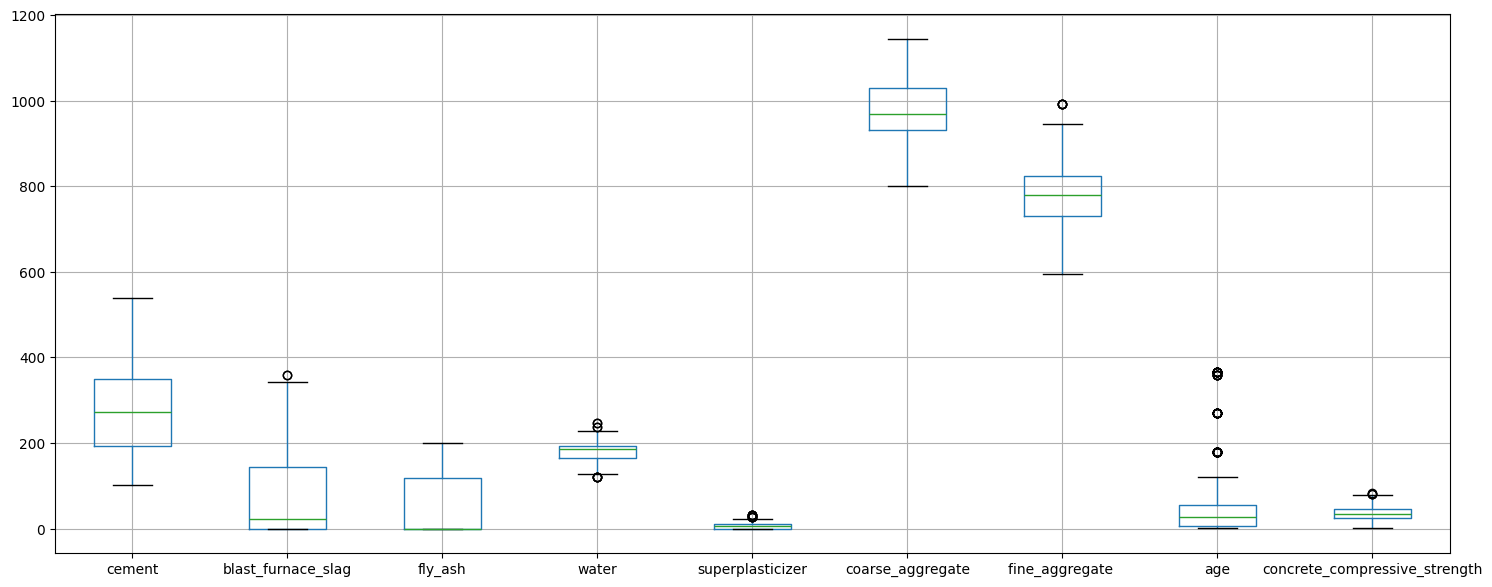

In [11]:
data.boxplot(figsize=(18,7))

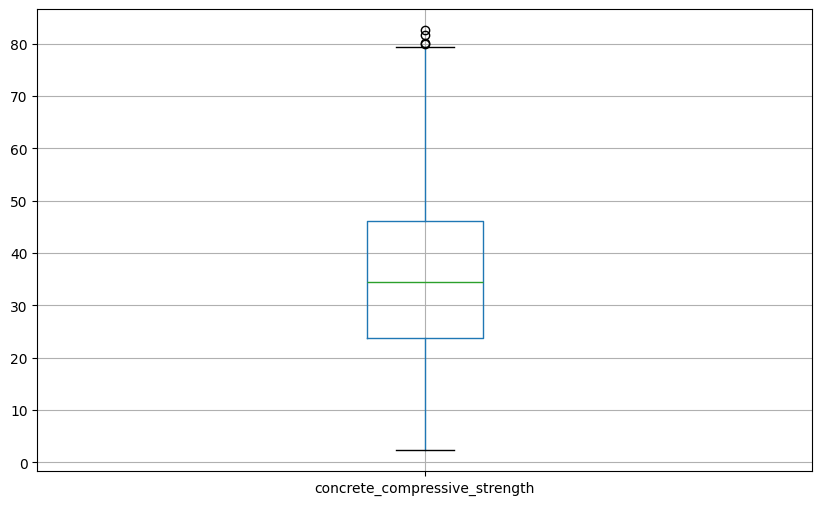

In [12]:
plt.figure(figsize=(10, 6))
data.boxplot(column='concrete_compressive_strength')
plt.show()

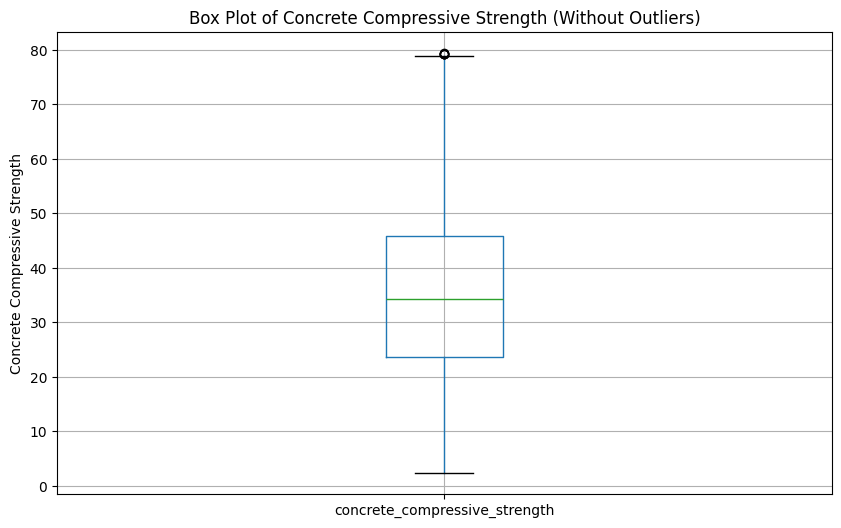

In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['concrete_compressive_strength'].quantile(0.25)
Q3 = data['concrete_compressive_strength'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = data[(data['concrete_compressive_strength'] >= lower_bound) & 
                     (data['concrete_compressive_strength'] <= upper_bound)]

# Create a box plot of the filtered data
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='concrete_compressive_strength')
plt.title('Box Plot of Concrete Compressive Strength (Without Outliers)')
plt.ylabel('Concrete Compressive Strength')
plt.show()

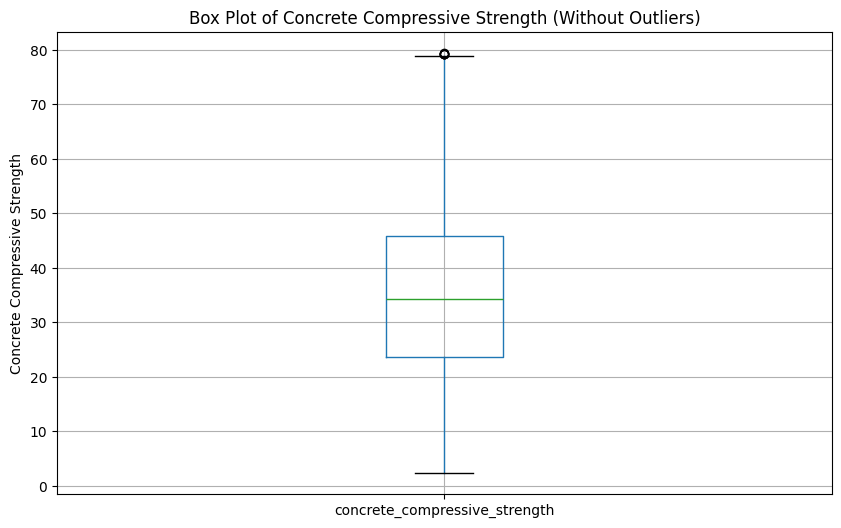

In [14]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['concrete_compressive_strength'].quantile(0.25)
Q3 = data['concrete_compressive_strength'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = data[(data['concrete_compressive_strength'] >= lower_bound) & 
                     (data['concrete_compressive_strength'] <= upper_bound)]

# Create a box plot of the filtered data
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='concrete_compressive_strength')
plt.title('Box Plot of Concrete Compressive Strength (Without Outliers)')
plt.ylabel('Concrete Compressive Strength')
plt.show()

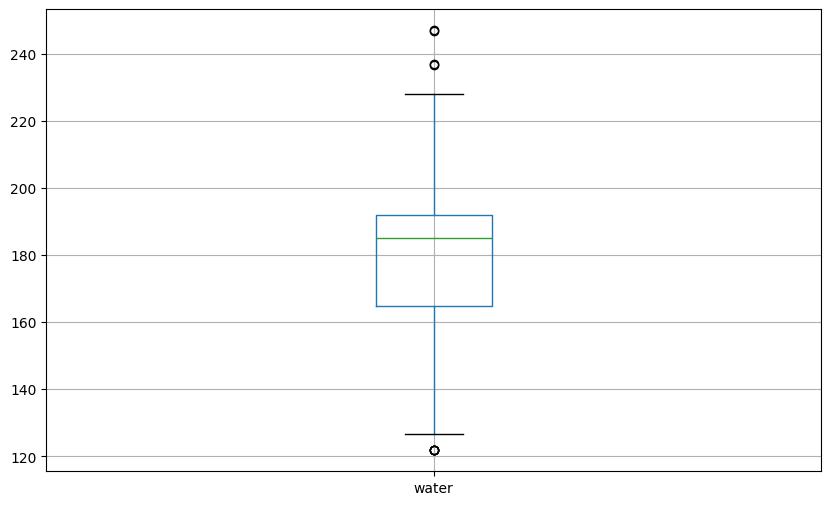

In [15]:
plt.figure(figsize=(10, 6))
data.boxplot(column='water')
plt.show()

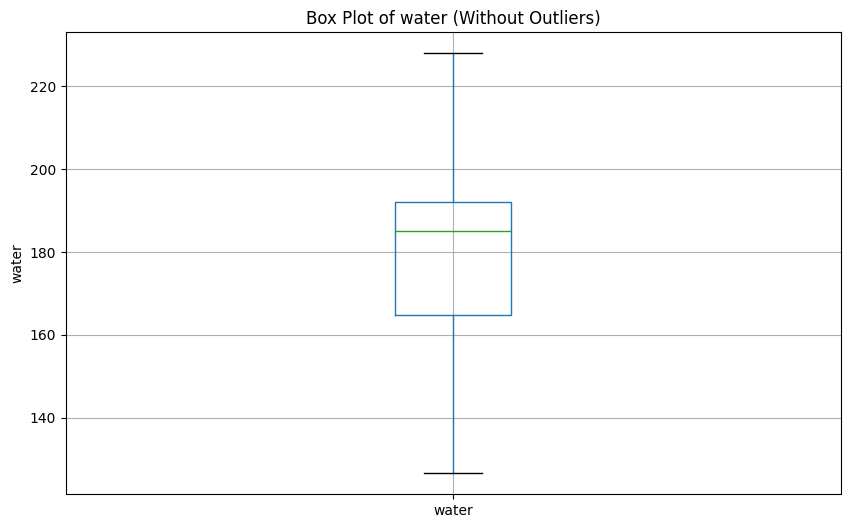

In [16]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['water'].quantile(0.25)
Q3 = data['water'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = data[(data['water'] >= lower_bound) & 
                     (data['water'] <= upper_bound)]

# Create a box plot of the filtered data
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='water')
plt.title('Box Plot of water (Without Outliers)')
plt.ylabel('water')
plt.show()

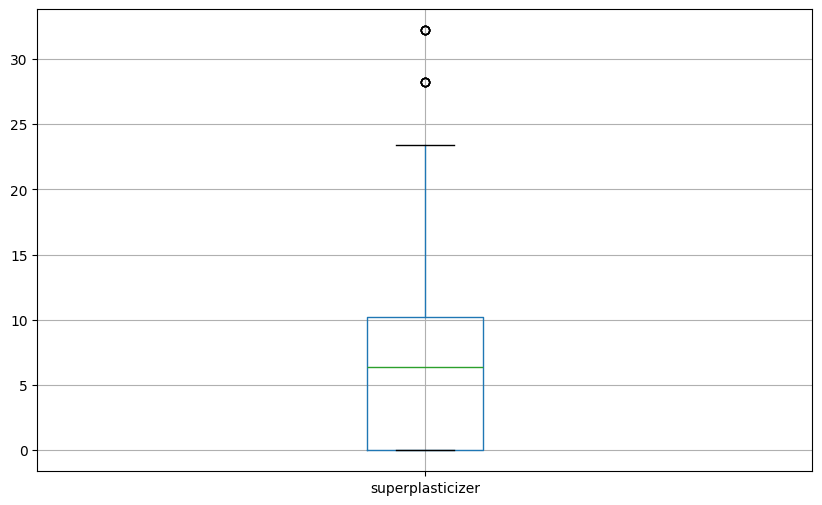

In [17]:
plt.figure(figsize=(10, 6))
data.boxplot(column='superplasticizer')
plt.show()

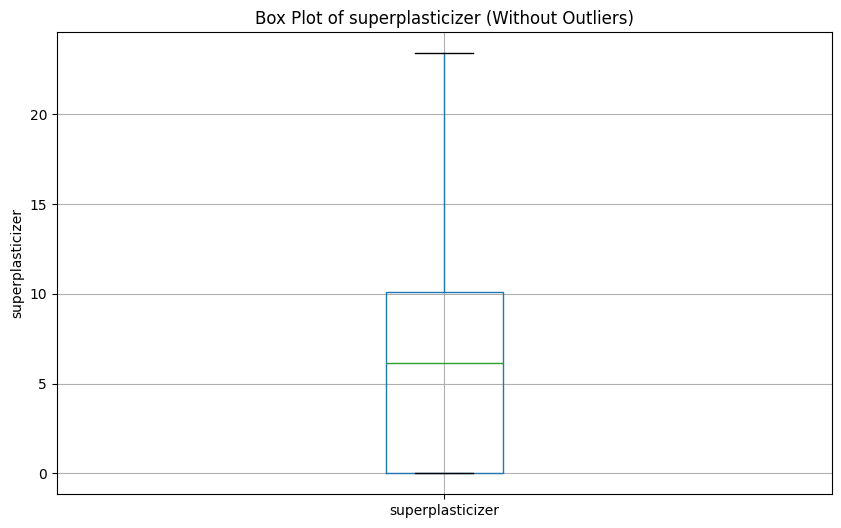

In [18]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['superplasticizer'].quantile(0.25)
Q3 = data['superplasticizer'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = data[(data['superplasticizer'] >= lower_bound) & 
                     (data['superplasticizer'] <= upper_bound)]

# Create a box plot of the filtered data
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='superplasticizer')
plt.title('Box Plot of superplasticizer (Without Outliers)')
plt.ylabel('superplasticizer')
plt.show()

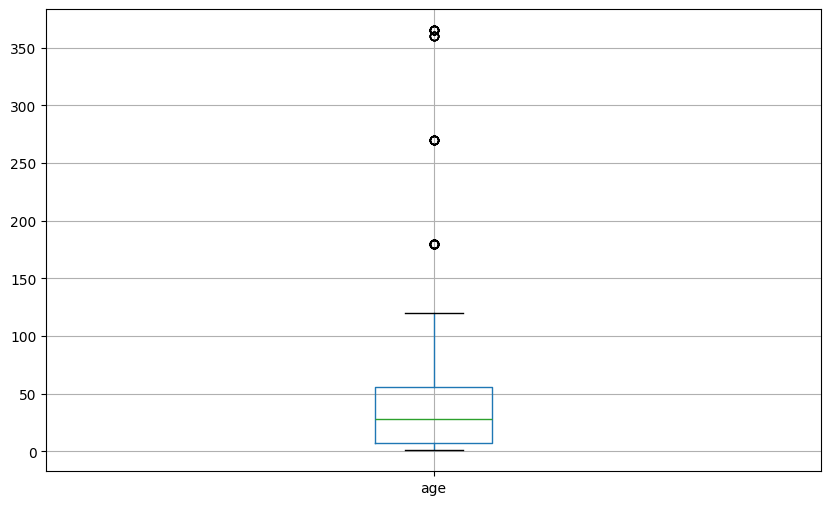

In [19]:
plt.figure(figsize=(10, 6))
data.boxplot(column='age')
plt.show()

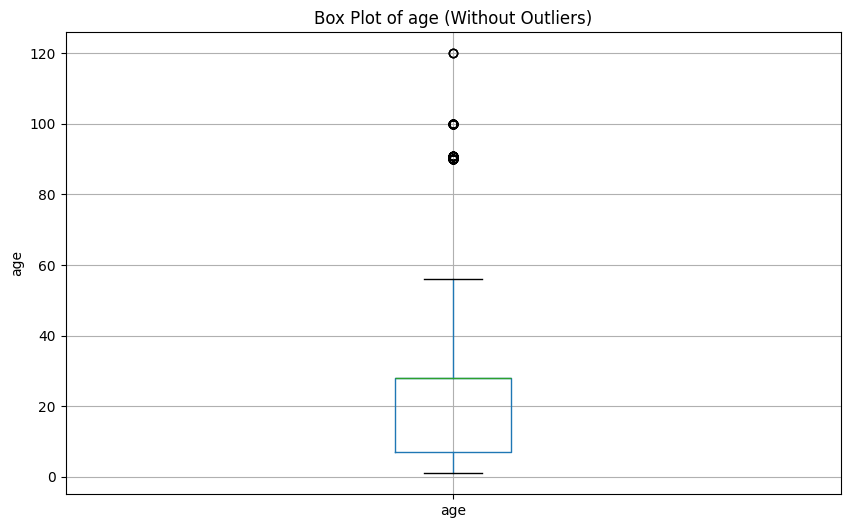

In [20]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = data[(data['age'] >= lower_bound) & 
                     (data['age'] <= upper_bound)]

# Create a box plot of the filtered data
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='age')
plt.title('Box Plot of age (Without Outliers)')
plt.ylabel('age')
plt.show()

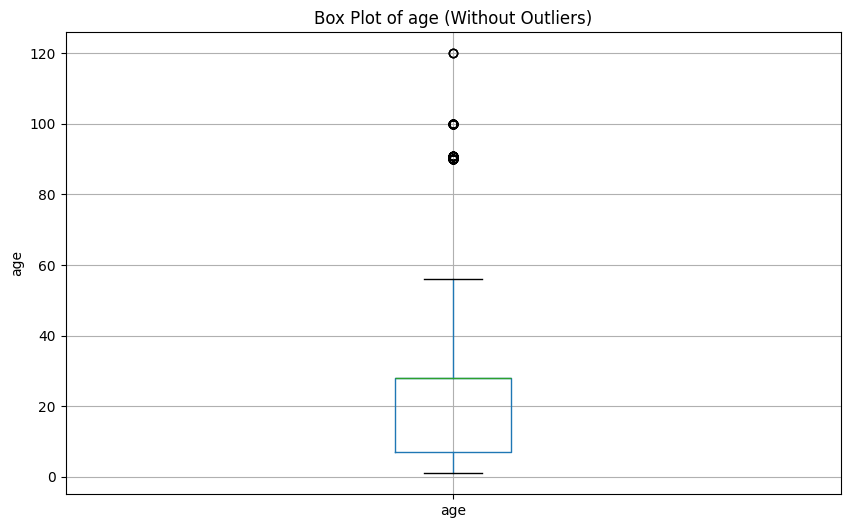

In [21]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = data[(data['age'] >= lower_bound) & 
                     (data['age'] <= upper_bound)]

# Create a box plot of the filtered data
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='age')
plt.title('Box Plot of age (Without Outliers)')
plt.ylabel('age')
plt.show()

In [22]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [23]:
data=filtered_data

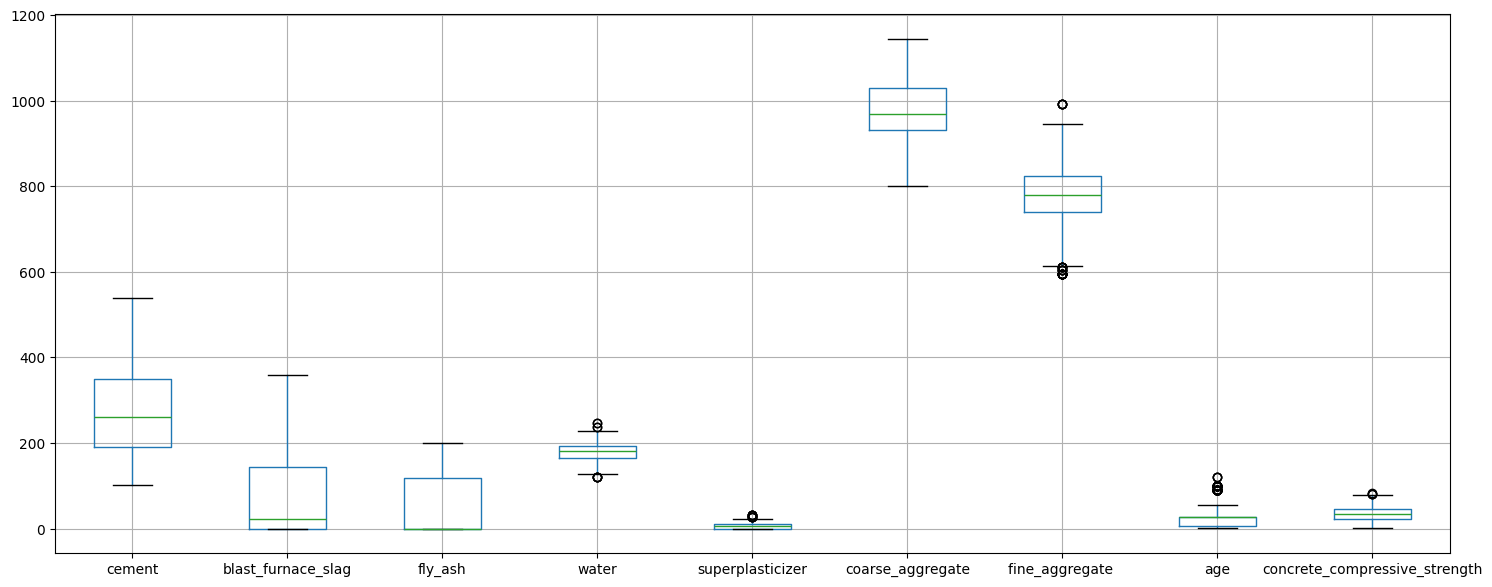

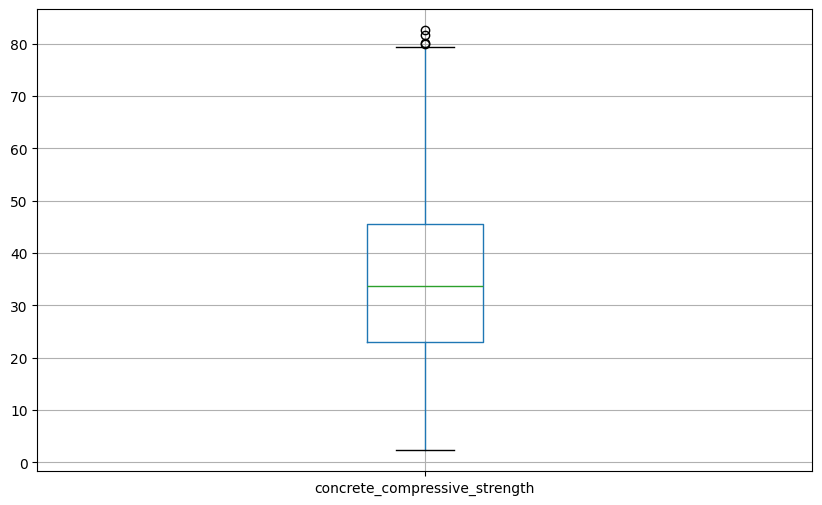

In [24]:
data.boxplot(figsize=(18,7))
plt.figure(figsize=(10, 6))
data.boxplot(column='concrete_compressive_strength')
plt.show()

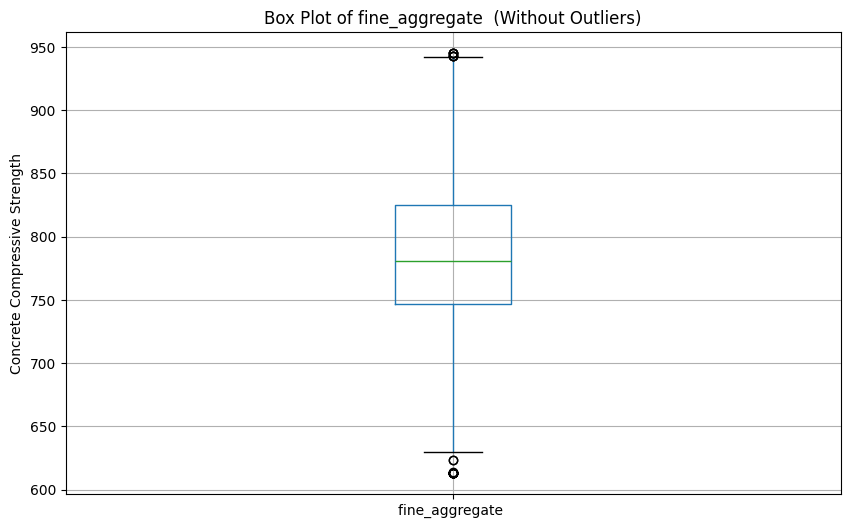

In [25]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['fine_aggregate '].quantile(0.25)
Q3 = data['fine_aggregate '].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = data[(data['fine_aggregate '] >= lower_bound) & 
                     (data['fine_aggregate '] <= upper_bound)]

# Create a box plot of the filtered data
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='fine_aggregate ')
plt.title('Box Plot of fine_aggregate  (Without Outliers)')
plt.ylabel('Concrete Compressive Strength')
plt.show()

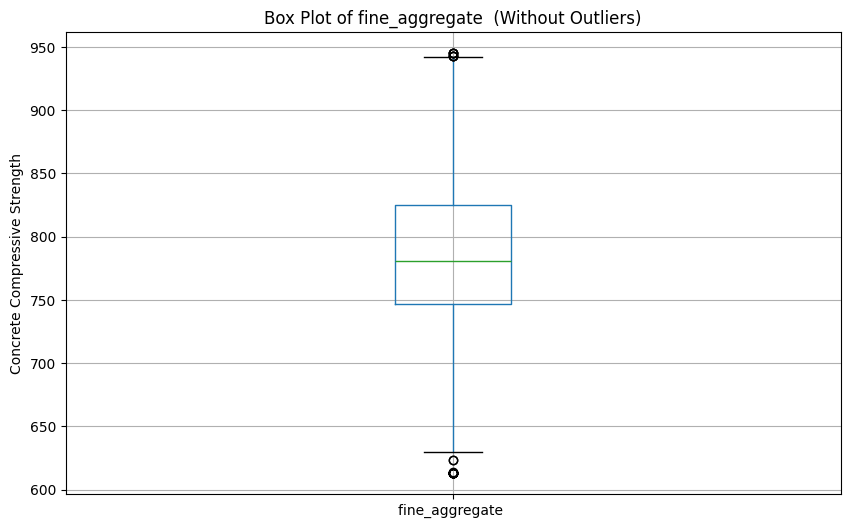

In [26]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['fine_aggregate '].quantile(0.25)
Q3 = data['fine_aggregate '].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = data[(data['fine_aggregate '] >= lower_bound) & 
                     (data['fine_aggregate '] <= upper_bound)]

# Create a box plot of the filtered data
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='fine_aggregate ')
plt.title('Box Plot of fine_aggregate  (Without Outliers)')
plt.ylabel('Concrete Compressive Strength')
plt.show()

In [27]:
filtered_data=data

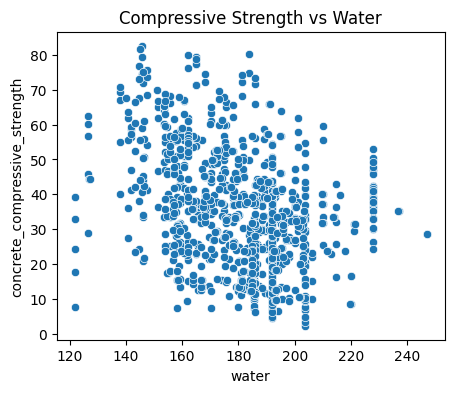

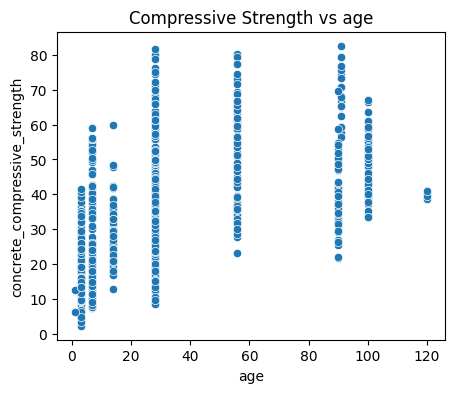

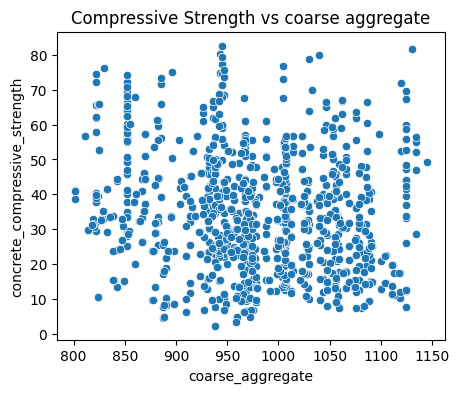

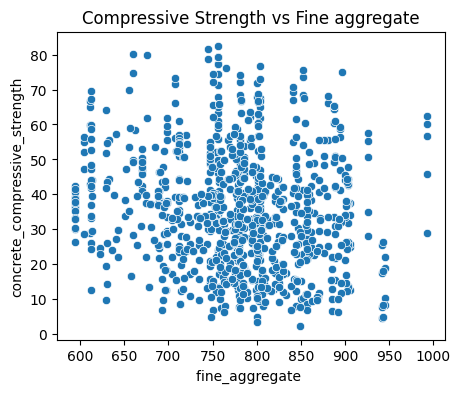

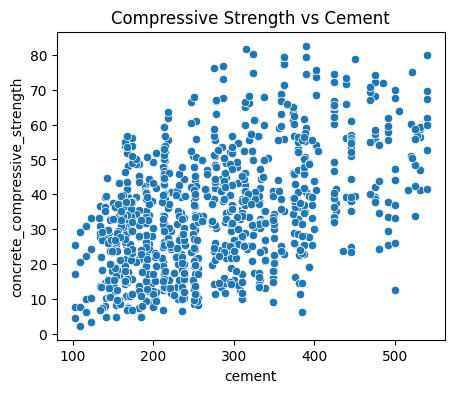

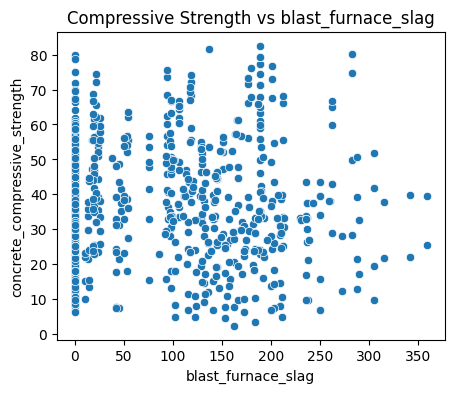

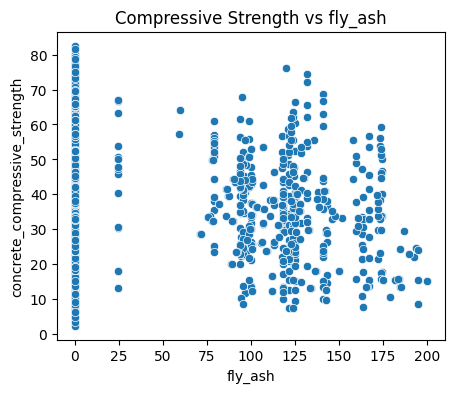

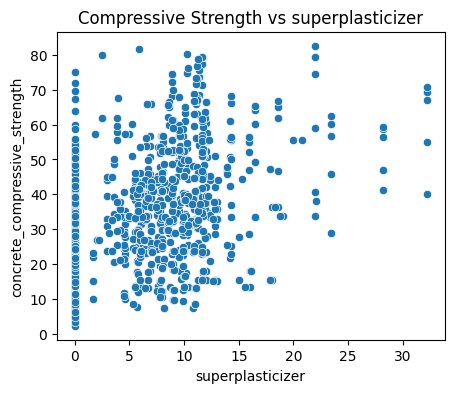

In [28]:
# Scatter plot for Water-Cement Ratio vs Compressive Strength
plt.figure(figsize=(5, 4))
sns.scatterplot(x='water', y='concrete_compressive_strength', data=data)
plt.title('Compressive Strength vs Water')
plt.show()

# Scatter plot for Age vs Compressive Strength
plt.figure(figsize=(5, 4))
sns.scatterplot(x='age', y='concrete_compressive_strength', data=data)
plt.title('Compressive Strength vs age')
plt.show()

# Scatter plot for Coarse aggregate vs Compressive Strength
plt.figure(figsize=(5, 4))
sns.scatterplot(x='coarse_aggregate', y='concrete_compressive_strength', data=data)
plt.title('Compressive Strength vs coarse aggregate')
plt.show()

# Scatter plot for Fine aggregate vs Compressive Strength
plt.figure(figsize=(5, 4))
sns.scatterplot(x='fine_aggregate ', y='concrete_compressive_strength', data=data)
plt.title('Compressive Strength vs Fine aggregate')
plt.show()

# Scatter plot for cement vs Compressive Strength
plt.figure(figsize=(5, 4))
sns.scatterplot(x='cement', y='concrete_compressive_strength', data=data)
plt.title('Compressive Strength vs Cement')
plt.show()

# Scatter plot for blast_furnace_slag vs Compressive Strength
plt.figure(figsize=(5, 4))
sns.scatterplot(x='blast_furnace_slag', y='concrete_compressive_strength', data=data)
plt.title('Compressive Strength vs blast_furnace_slag')
plt.show()

# Scatter plot for fly_ash vs Compressive Strength
plt.figure(figsize=(5, 4))
sns.scatterplot(x='fly_ash', y='concrete_compressive_strength', data=data)
plt.title('Compressive Strength vs fly_ash')
plt.show()

# Scatter plot for superplasticizer vs Compressive Strength
plt.figure(figsize=(5, 4))
sns.scatterplot(x='superplasticizer', y='concrete_compressive_strength', data=data)
plt.title('Compressive Strength vs superplasticizer')
plt.show()

In [29]:
df = pd.DataFrame(data)
df.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.256149,-0.393904,-0.134447,0.131766,-0.133171,-0.180379,-0.028395,0.492745
blast_furnace_slag,-0.256149,1.000000,-0.348006,0.114140,0.034615,-0.284030,-0.297220,-0.035129,0.144631
fly_ash,-0.393904,-0.348006,1.000000,-0.207486,0.342753,-0.010940,0.039244,0.051209,-0.083435
water,-0.134447,0.114140,-0.207486,1.000000,-0.642786,-0.169963,-0.398017,-0.034664,-0.370366
superplasticizer,0.131766,0.034615,0.342753,-0.642786,1.000000,-0.280693,0.188585,0.055688,0.419374
coarse_aggregate,-0.133171,-0.284030,-0.010940,-0.169963,-0.280693,1.000000,-0.201335,0.018304,-0.182114
fine_aggregate,-0.180379,-0.297220,0.039244,-0.398017,0.188585,-0.201335,1.000000,0.048389,-0.126917
age,-0.028395,-0.035129,0.051209,-0.034664,0.055688,0.018304,0.048389,1.000000,0.514705
concrete_compressive_strength,0.492745,0.144631,-0.083435,-0.370366,0.419374,-0.182114,-0.126917,0.514705,1.000000


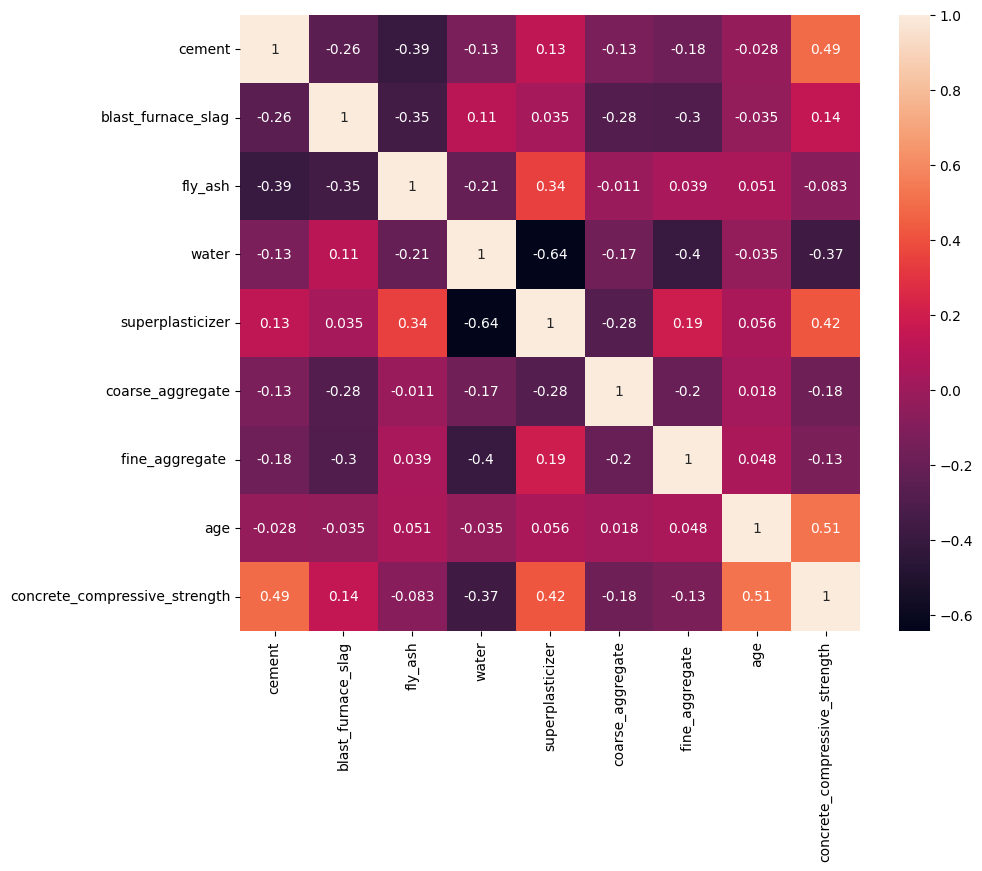

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

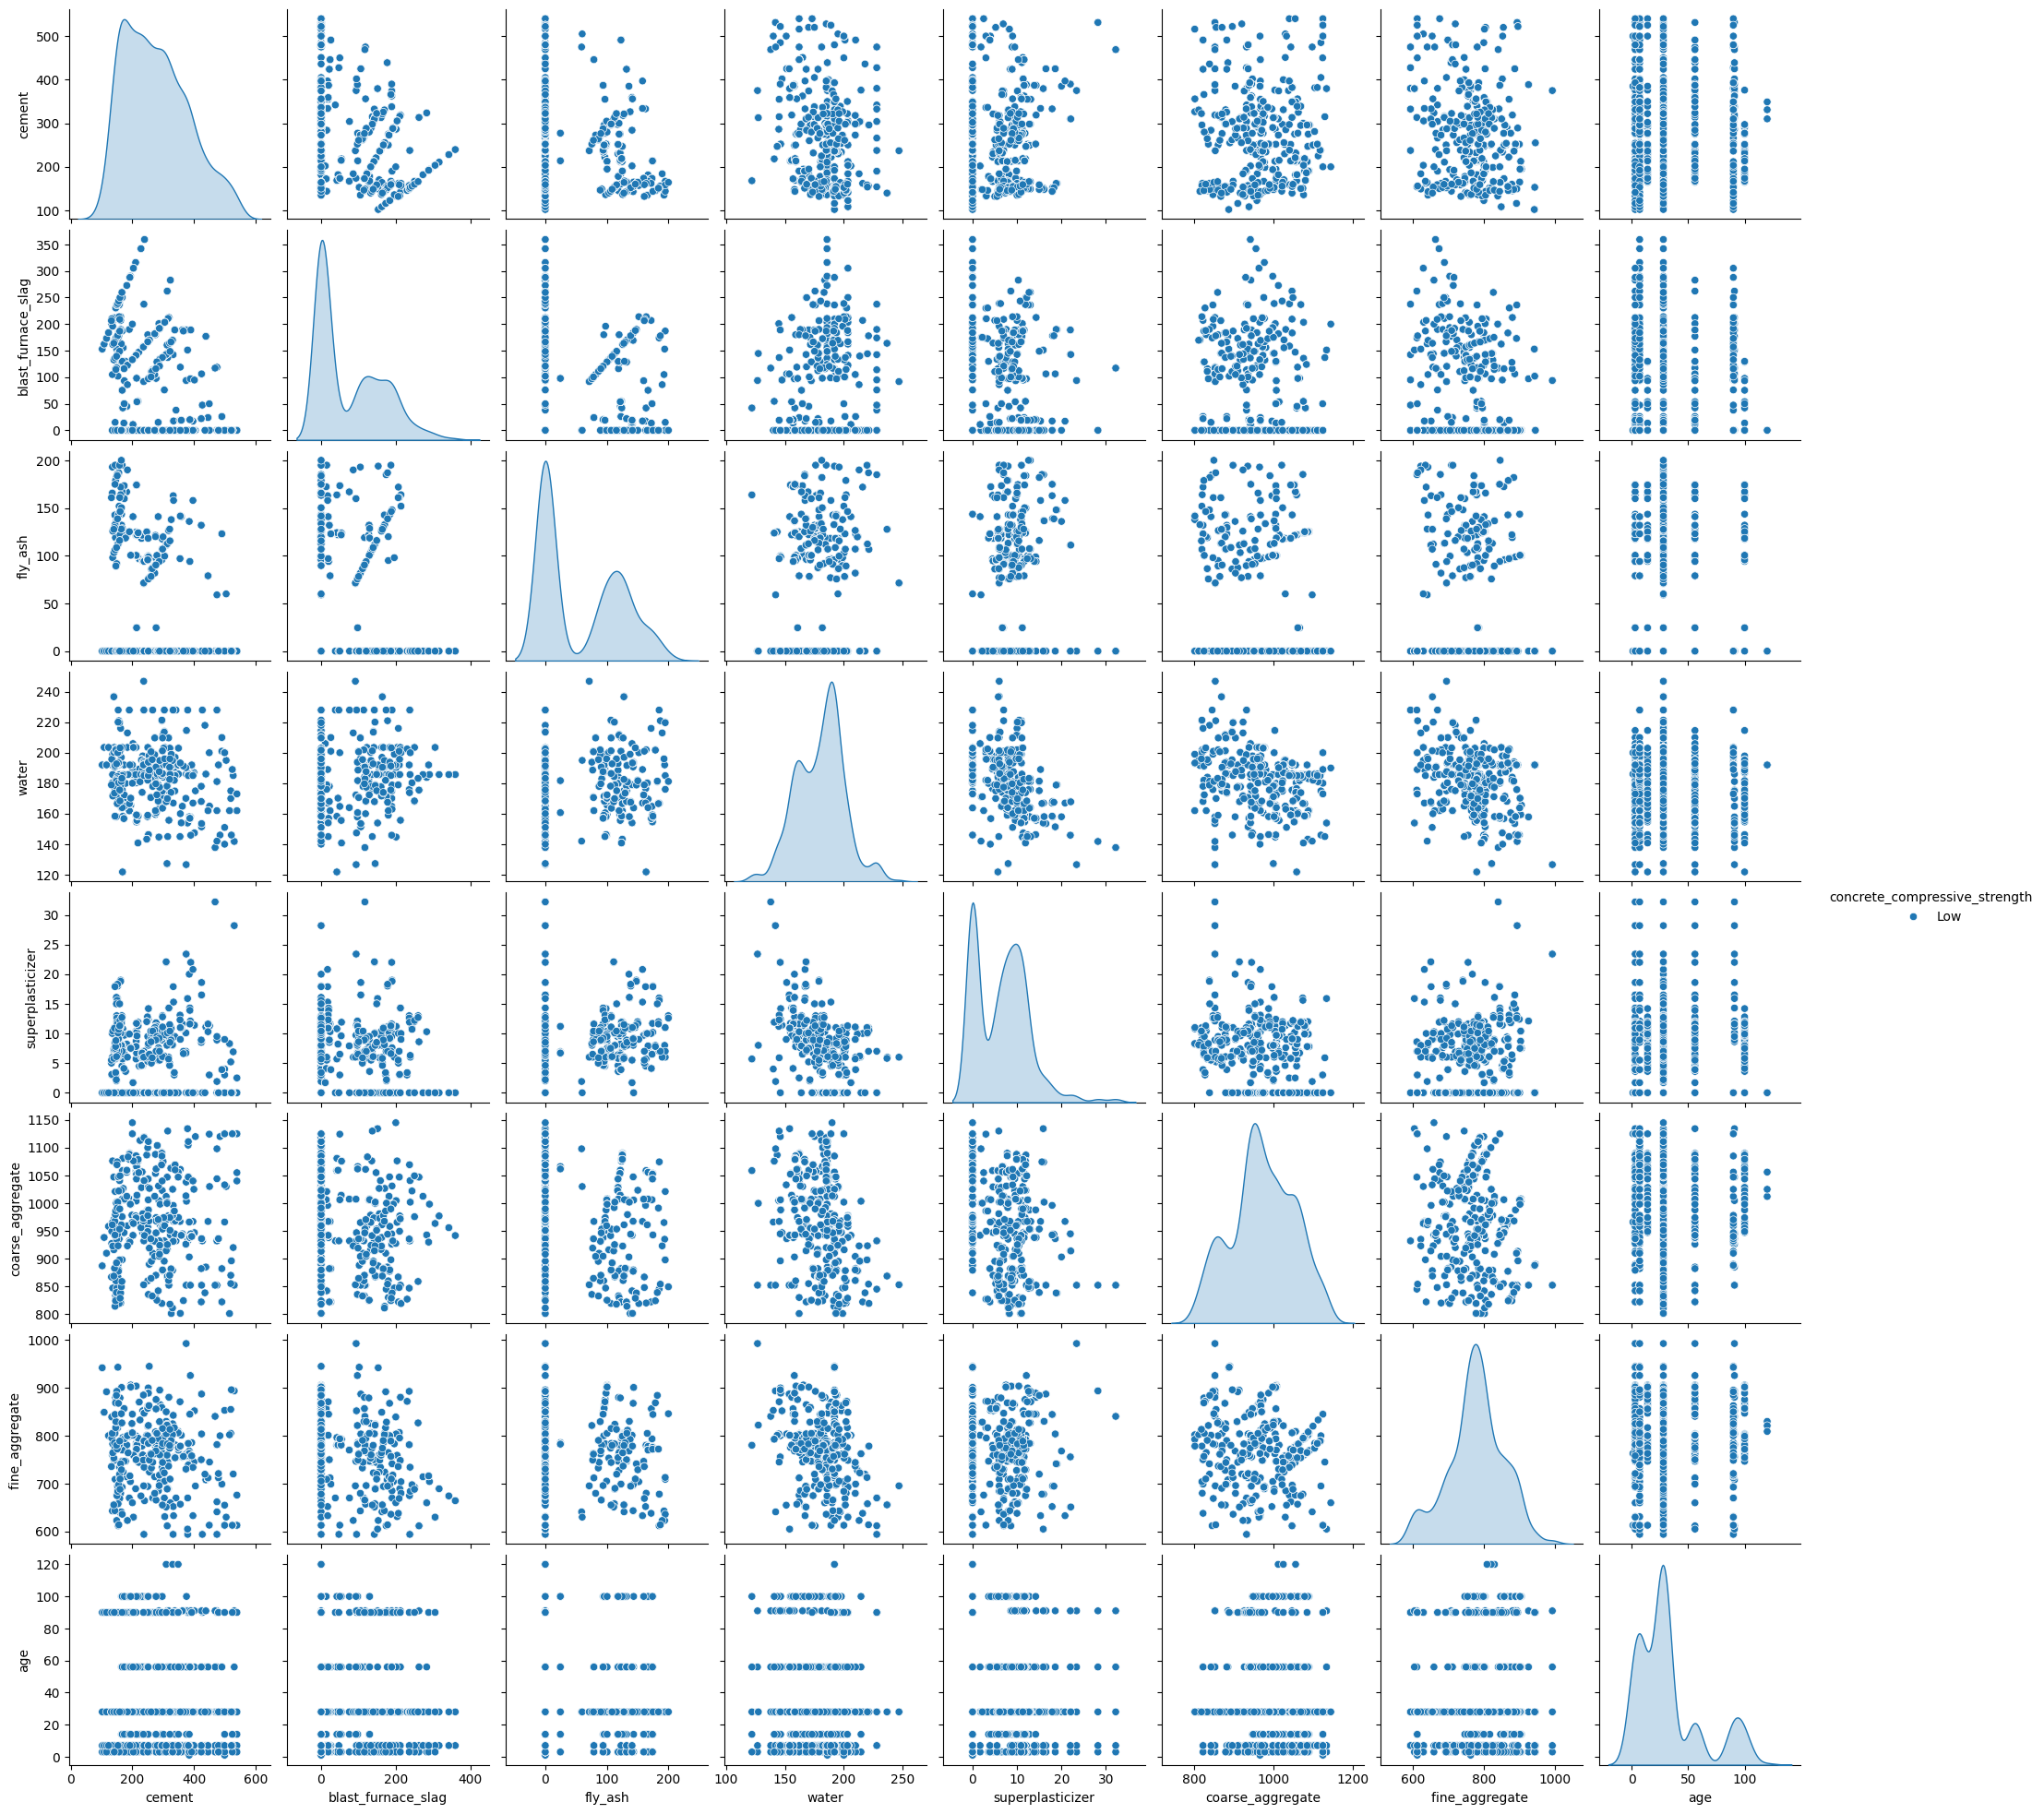

In [31]:
dpair=data.copy()
dpair['concrete_compressive_strength']=np.where(dpair['concrete_compressive_strength']==1,'High','Low')
sns.pairplot(dpair,hue='concrete_compressive_strength')
plt.show()

# Splitting the data

In [33]:
x=data.drop(columns='concrete_compressive_strength',axis=1)
x

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [34]:
y=data.concrete_compressive_strength
y

0       79.99
1       61.89
5       47.03
7       36.45
8       45.85
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 971, dtype: float64

# Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()

In [37]:
scaler.fit_transform(x)

array([[ 2.51842266, -0.86243904, -0.89217038, ...,  0.85202951,
        -1.3258399 , -0.15785571],
       [ 2.51842266, -0.86243904, -0.89217038, ...,  1.04269651,
        -1.3258399 , -0.15785571],
       [-0.11612429,  0.45239339, -0.89217038, ..., -0.52077292,
        -1.40406815,  2.00985177],
       ...,
       [-1.24590264,  0.74534728,  0.79342646, ..., -1.02413381,
         0.0301164 , -0.15785571],
       [-1.14398221,  1.2908874 , -0.89217038, ...,  0.21138838,
         0.14615497, -0.15785571],
       [-0.16516148,  0.29668955,  0.32313563, ..., -1.37877443,
        -0.21108737, -0.15785571]])

# Splitting the data into train and test

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# Model Building

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr=LinearRegression()

In [41]:
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred=lr.predict(x_test)

In [43]:
from sklearn.metrics import r2_score

In [44]:
score=r2_score(y_pred,y_test)

In [45]:
print("R2 score: ",score*100)

R2 score:  71.45646613461942


In [46]:
from sklearn import metrics

In [47]:
print("MSE: ",metrics.mean_squared_error(y_pred,y_test))

MSE:  62.467942036660126


In [48]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

RMSE:  7.903666366735132


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
grb=GradientBoostingRegressor()
grb.fit(x_train,y_train)

GradientBoostingRegressor()

In [51]:
y_pred=grb.predict(x_test)

In [52]:
score=r2_score(y_pred,y_test)
print("R2 score: ",score*100)

R2 score:  88.81108653166656


In [53]:
print("MSE: ",metrics.mean_squared_error(y_pred,y_test))

MSE:  27.01177924274266


In [54]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

RMSE:  5.197285757272026


In [55]:
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso

In [56]:
r=Ridge()
l=Lasso()

In [57]:
r.fit(x_train,y_train)


Ridge()

In [58]:
l.fit(x_train,y_train)

Lasso()

In [59]:
pred1=r.predict(x_test)

In [60]:
pred2=l.predict(x_test)

In [61]:
from sklearn import metrics

In [62]:
score=metrics.r2_score(pred1,y_test)
print("R2 score: ",score*100)

R2 score:  71.45645884210938


In [63]:
print("MSE: ",metrics.mean_squared_error(pred1,y_test))

MSE:  62.46780180902786


In [64]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(pred1,y_test)))

RMSE:  7.903657495680583


In [65]:
score=metrics.r2_score(pred2,y_test)

In [66]:
print("R2 score: ",score*100)

R2 score:  71.363261551931


In [67]:
print("MSE: ",metrics.mean_squared_error(pred2,y_test))

MSE:  62.085175545855364


In [68]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(pred2,y_test)))

RMSE:  7.879414670256628


In [69]:
import xgboost
xgb=xgboost.XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [70]:
y_pred=xgb.predict(x_test)

In [71]:
y_pred=xgb.predict(x_test)
score=r2_score(y_test,y_pred)

In [72]:
print("R2 score: ",score*100)

R2 score:  93.11918057409176


In [73]:
print("MSE: ",metrics.mean_squared_error(y_pred,y_test))

MSE:  20.446855694652488


In [74]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

RMSE:  4.521819953807591


In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf=RandomForestRegressor(criterion='squared_error',random_state=0)

In [77]:
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

In [78]:
score=r2_score(y_test,pred)
print('R2 score of Random Forest Regression:',score*100)

R2 score of Random Forest Regression: 91.08323808304432


In [79]:
print("MSE: ",metrics.mean_squared_error(pred,y_test))

MSE:  26.496806978116595


In [80]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(pred,y_test)))

RMSE:  5.147504927449472


# Hyperparameter Tuning

#### GradientBoostingRegressor using GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

In [83]:
gb = GradientBoostingRegressor()

In [84]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [85]:
best_gb = grid_search.best_estimator_
y_pred0 = best_gb.predict(x_test)

In [86]:
grid_search.best_score_

0.916712297190122

In [87]:
print("MAE: ",metrics.mean_absolute_error(y_pred,y_test))
print("MSE: ",metrics.mean_squared_error(y_pred,y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

MAE:  3.0454332544375693
MSE:  20.446855694652488
RMSE:  4.521819953807591


#### XGBRegressor using GridSearchCV

In [88]:
from xgboost import XGBRegressor
# Initialize the XGBRegressor
xgb = XGBRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.05],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [127]:
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(x_test)

In [128]:
grid_search.best_score_

0.8814942948380871

In [129]:
print("MAE: ",metrics.mean_absolute_error(y_pred,y_test))
print("MSE: ",metrics.mean_squared_error(y_pred,y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

MAE:  3.6907876898656995
MSE:  27.090347957893595
RMSE:  5.204838898361177


In [130]:
from sklearn.svm import SVR

#### GradientBoostingRegressor using RandomizedSearchCV

In [131]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [132]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
gb = GradientBoostingRegressor()
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.6, 0.4),
    'max_features': ['auto', 'sqrt', 'log2', None]
}
random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, 
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)
best_gb = random_search.best_estimator_
y_pred = best_gb.predict(x_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\nanin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nanin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nanin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\nanin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.

In [133]:
best_gb = random_search.best_estimator_
y_pred = best_gb.predict(x_test)

In [134]:
r2=r2_score(y_pred,y_test)
r2

0.9410488088794866

In [135]:
print("MAE: ",metrics.mean_absolute_error(y_pred,y_test))
print("MSE: ",metrics.mean_squared_error(y_pred,y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

MAE:  2.7095015888519054
MSE:  16.029167524408656
RMSE:  4.003644280453579


#### RandomForestRegressor Using RandomizedSearchCV

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [138]:
rfr = RandomForestRegressor()

param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rfr, param_distributions=param_dist, 
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(x_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CE6D13FBC0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CE6D22FAA0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CE6D22E330>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CE6E22E9F0>},
                   random_state=42, verbose=2)

In [139]:
best_rfr = random_search.best_estimator_
y_pred = best_rfr.predict(x_test)

In [140]:
r2 = r2_score(y_test, y_pred)
r2

0.8964596945715636

In [114]:
print("MAE: ",metrics.mean_absolute_error(y_pred,y_test))
print("MSE: ",metrics.mean_squared_error(y_pred,y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

MAE:  3.9719623149595416
MSE:  30.34844108164759
RMSE:  5.508941920337116


#### XGBRegressor using RandomizedSearchCV

In [120]:
xgb_reg = XGBRegressor()

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_dist, 
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(x_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CE6E151CD0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CE6D1AFF80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CE6D16EA50>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CE6D1AFE30>},
                   random_state=42, verbose=2)

In [121]:
best_xgb_reg = random_search.best_estimator_
y_pred = best_xgb_reg.predict(x_test)

In [123]:
r2 = r2_score(y_test, y_pred)
r2

0.940805163311364

In [124]:
print("MAE: ",metrics.mean_absolute_error(y_pred,y_test))
print("MSE: ",metrics.mean_squared_error(y_pred,y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

MAE:  2.9416536297431355
MSE:  17.590176528739523
RMSE:  4.1940644402225775


#### RandomForestRegressor using GridSearchCV

In [125]:
rfr = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [126]:
# Evaluate the model with the test set
best_rfr = grid_search.best_estimator_
y_pred = best_rfr.predict(x_test)
r2 = r2_score(y_test, y_pred)
r2

0.908834984084111

In [286]:
print("MAE: ",metrics.mean_absolute_error(y_pred,y_test))
print("MSE: ",metrics.mean_squared_error(y_pred,y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

MAE:  3.6378726166056214
MSE:  26.334695538705002
RMSE:  5.1317341648515855


In [558]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
r2_score(y_test,y_pred)

0.9311918057409176

In [391]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [393]:

def pred_strength(cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age, model):
    features = np.array([cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age]).reshape(1, -1)
    pred = model.predict(features)
    return pred[0]
cement = 540.0
blast_furnace_slag = 0.0
fly_ash = 0.0
water = 162.0
superplasticizer = 2.5
coarse_aggregate = 1040.0
fine_aggregate = 676.0
age = 28

strength = pred_strength(cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age, xgb)
print("Predicted Strength:", strength)


Predicted Strength: 79.83737


In [143]:
import pickle
pickle.dump(gb,open('cement.pkl','wb'))